# Aditya Sunilkumar

## **What relation does the distance from home and distance from last transaction attribute have when a transaction is made using CHIP. How does that affect the likelihood of the transaction being considered as fraudulent?**

As a witness to my friend's experience with credit card fraud, I have become increasingly interested in the subject. In particular, I find the distance from home data points in our dataset to be of great significance in determining the likelihood of a credit card transaction being classified as fraudulent. To achieve an accurate prediction, it is crucial to conduct a thorough analysis of the trends and patterns within the dataset. By carefully examining the data and creating various graphs and charts for analysis, we can identify key indicators that will help us determine the likelihood of a fraudulent transaction. By analyzing the distance from home data points, we can gain insight into whether or not a transaction was made using chip or pin number. This information can be used to establish a baseline for what is considered normal behavior for a cardholder in a particular location. Any transactions that deviate significantly from this baseline can then be flagged for further investigation, as they may be indicative of fraudulent activity. Overall, by utilizing advanced data analysis techniques, we can more accurately predict and prevent credit card fraud, ultimately protecting both individuals and businesses from financial losses.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
df = pd.read_csv("../data/raw/card_transdata.csv")
df

/var/folders/56/0p56s1n56dj25gw5vc4wyxj00000gn/T/ipykernel_49723/2124225476.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/card_transdata.csv")


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**DATA WRANGLING - Since we are working with a huge dataset with alomst a million data points, it would be easier to analyze the data if we remove some data points that fall within a range. We are filtering the data based on conditions that have the largest number of unwanted datapoints that would not really help analyze credit card fraud. Now, it would be easier to plot meaningful and relevant charts.**

In [2]:
df = df.dropna(subset=['distance_from_home'])
df = pd.DataFrame(df)
df = df.dropna(axis=1,how='any')
df = df[(df['distance_from_last_transaction'] < 75) & (df['ratio_to_median_purchase_price'] < 30)&(df['distance_from_home'] < 400)]

midpoint = len(df) // 170
df = df.iloc[:midpoint]
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
5059,1.503427,0.513221,0.299334,0.0,1.0,0.0,1.0,0.0
5060,4.840358,0.075229,2.515626,1.0,0.0,0.0,0.0,0.0
5061,157.836423,3.272468,1.134216,1.0,0.0,0.0,0.0,0.0
5062,18.490309,5.432083,6.498450,1.0,1.0,0.0,1.0,1.0


**Let us first describe the dataset we're working on.**

In [3]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000
mean,24.507603,3.568523,1.735620,0.886645,0.338265,0.102759,0.649540,0.081168
std,41.850352,7.519267,2.301003,0.317058,0.473166,0.303674,0.477162,0.273120
min,0.049270,0.001448,0.016933,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.023785,0.298427,0.494809,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.192843,0.968420,0.994228,1.000000,0.000000,0.000000,1.000000,0.000000
75%,26.385264,3.165247,2.023261,1.000000,1.000000,0.000000,1.000000,0.000000
max,394.061385,74.528852,27.939333,1.000000,1.000000,1.000000,1.000000,1.000000


**The describe function gives us some useful inputs on the attributes we are working with. We are able to see the mean, standard deviation, max and min values for all relevant columns: distance from home, distance from last transaction, and used chip. From the mean of used chip we can tell that about 33% of all recorded transactions were made with chip. Distance from home has a minimum value of 0.04 and max value of 394 whereas the distance from last transaction has a min value of 0.001 and max value of almost 75. All the values from the table above can help us further understand the data we are working with.** 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002 entries, 0 to 5063
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              5002 non-null   float64
 1   distance_from_last_transaction  5002 non-null   float64
 2   ratio_to_median_purchase_price  5002 non-null   float64
 3   repeat_retailer                 5002 non-null   float64
 4   used_chip                       5002 non-null   float64
 5   used_pin_number                 5002 non-null   float64
 6   online_order                    5002 non-null   float64
 7   fraud                           5002 non-null   float64
dtypes: float64(8)
memory usage: 351.7 KB


**Using the info() function on the dataframe we can see that there are 5002 non-null values for each column present in this dataset.**

**Now, let's look at how the two variables of interest are distributed ("distance_from_home" and "distance_from_last_transaction"), using histograms:**

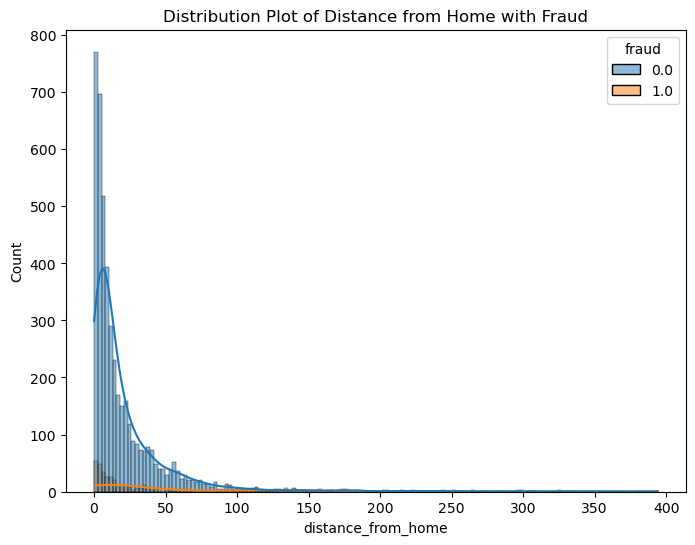

In [6]:
plt.figure(figsize=(8,6))
sns.histplot(df, x="distance_from_home", hue="fraud", kde=True)
plt.title('Distribution Plot of Distance from Home with Fraud')
plt.show()

**Clearly, we can tell that there are much higher transactions recorded with smaller values for distance from home and lesser transactions recorded for larger values of distance from home.**

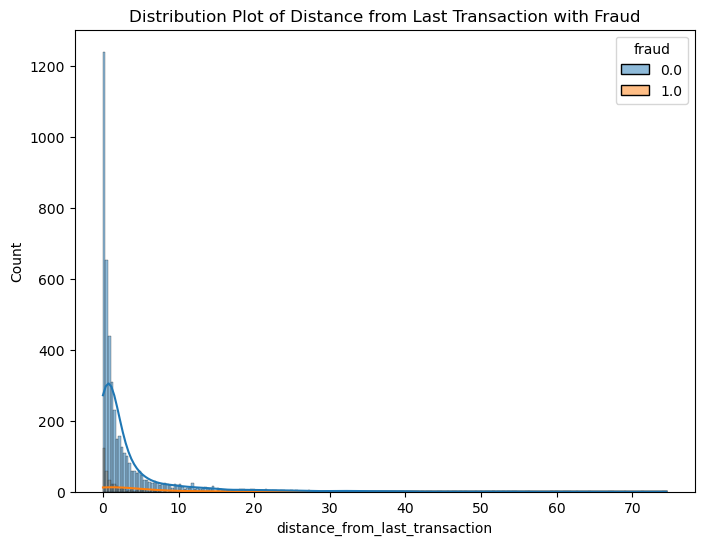

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(df, x="distance_from_last_transaction", hue="fraud", kde=True)
plt.title('Distribution Plot of Distance from Last Transaction with Fraud')
plt.show()

**The same for distance from last transaction.**

**Next, let's create a scatter plot to find a relationship between distance from home and distance from last transaction for fraudulent and non-fraudulent transactions:**

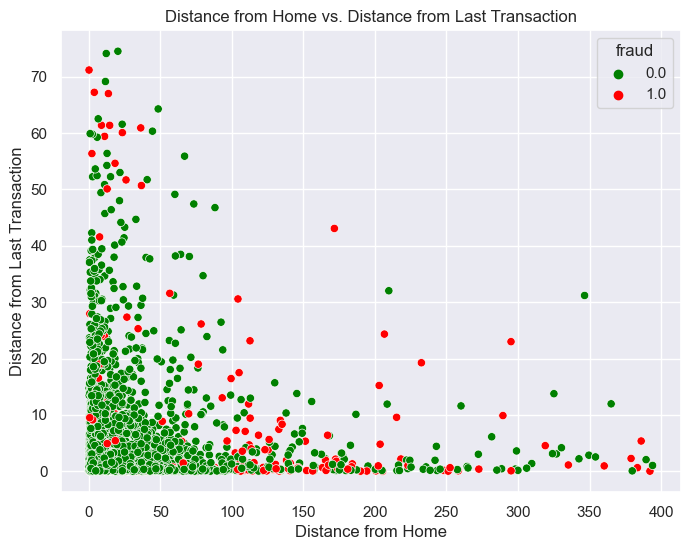

In [19]:
sns.scatterplot(x='distance_from_home', y='distance_from_last_transaction', data=df, hue='fraud', palette=['green', 'red'])
plt.xlabel('Distance from Home')
plt.ylabel('Distance from Last Transaction')
plt.title('Distance from Home vs. Distance from Last Transaction')
plt.show()

**From this plot we can make a generalization that a majority of fraudulent transactions are made with distance from home > 100 and distance from last transaction < 30, with exceptions as well. So we can use this approximation to assume fraudulent transactions to not fit these conditions. 
Now, let's explore how these distances are related to the likelihood of a transaction being fraudulent. We can start by creating a box plot of "distance_from_home" for each class of fraudulent and non-fraudulent transactions:**

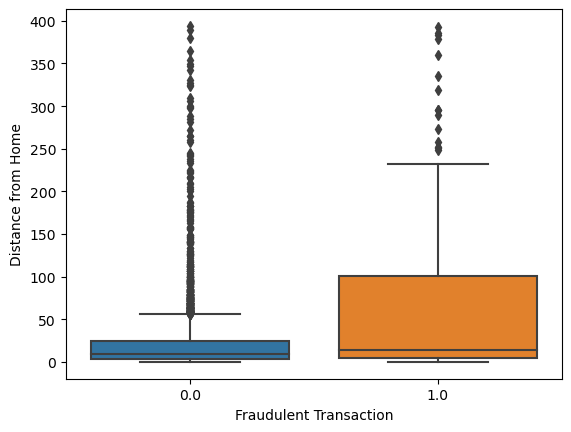

In [10]:
sns.boxplot(x='fraud', y='distance_from_home', data=df)
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Distance from Home')
plt.show()

**We can see that fraudulent transactions tend to have larger distances from home than non-fraudulent ones. We can also say that for any distance from home value greater than 225, there is a possibility of the transaction being a fraud. For any value less than 225, the transaction is going to be legitimate.**

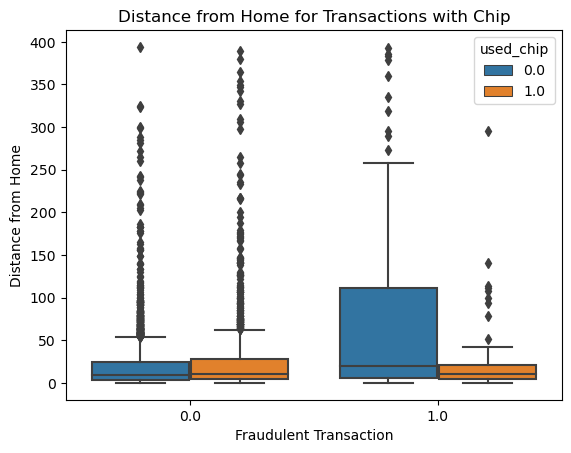

In [12]:
# Create a box plot for transactions made with chip number
sns.boxplot(x='fraud', y='distance_from_home', hue='used_chip', data=df)
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Distance from Home')
plt.title('Distance from Home for Transactions with Chip')
plt.show()




**This plot is essientially an addition to the previous plot, we can now see that for fraudulent transactions made with chip, they usually have smaller distance from home values compared to if the transaction was not made with chip. We can clearly see from the plot that fraudulent transactions that did not use chip have a maximum value of approximately 250 and fraudulent transactions that used chip have been made much closer to home with maximum value of a little less than 50.**

**Similarly, we can create a box plot of "distance_from_last_transaction" for each class of transactions:**

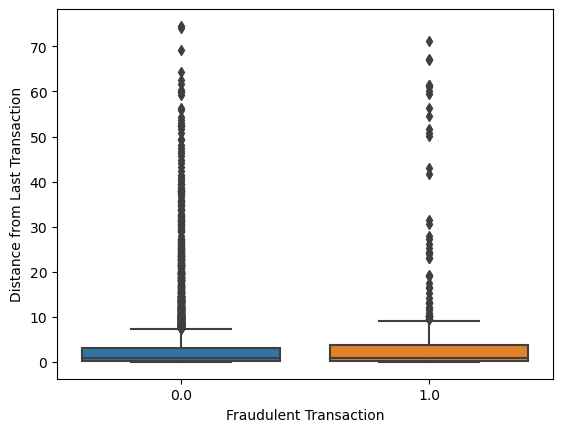

In [11]:
sns.boxplot(x='fraud', y='distance_from_last_transaction', data=df)
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Distance from Last Transaction')
plt.show()


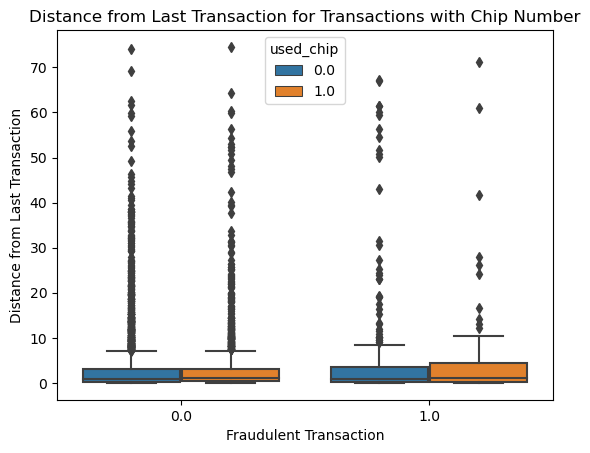

In [14]:
# Create a box plot for transactions made with chip number
sns.boxplot(x='fraud', y='distance_from_last_transaction', hue='used_chip', data=df)
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Distance from Last Transaction')
plt.title('Distance from Last Transaction for Transactions with Chip Number')
plt.show()

**We can see that fraudulent transactions tend to have smaller distances from the last transaction compared to non-fraudulent ones, indicating that on average fraudulent transactions have been made close to the point the last transaction was made. So we can assume that, if the distance of last transaction is above a certain value, it is less likely for the transaction to be fraudulent.**

In [23]:
df_fraudulent = df[df['fraud'] == 1]
largest_distance = df_fraudulent['distance_from_last_transaction'].max()
smallest_distance = df_fraudulent['distance_from_last_transaction'].min()
print(largest_distance)
print(smallest_distance)



71.19618154
0.001603804


**This code gives us the largest value for distance from last transaction for a fraudulent transaction. Hence we can say with certainty that if the distance from last transaction value is greater than 71.19618154, the transaction is going to be non-fraudulent.**

**Finally, we can create a pair plot to visualize the relationships between the distances and the other numerical variables in the dataset:**

**This plot allows us to see the relationships between the distances and the other variables, as well as how these relationships differ between fraudulent and non-fraudulent transactions.**

**Since the research question involves exploring the relationship between the distance from home attribute and the distance from the last transaction attribute when a transaction is made using a chip and pin number, we can create a heatmap to visualize the correlation between these variables.**

In [26]:
df1 = df.drop(['repeat_retailer', 'ratio_to_median_purchase_price', 'online_order'], axis=1)


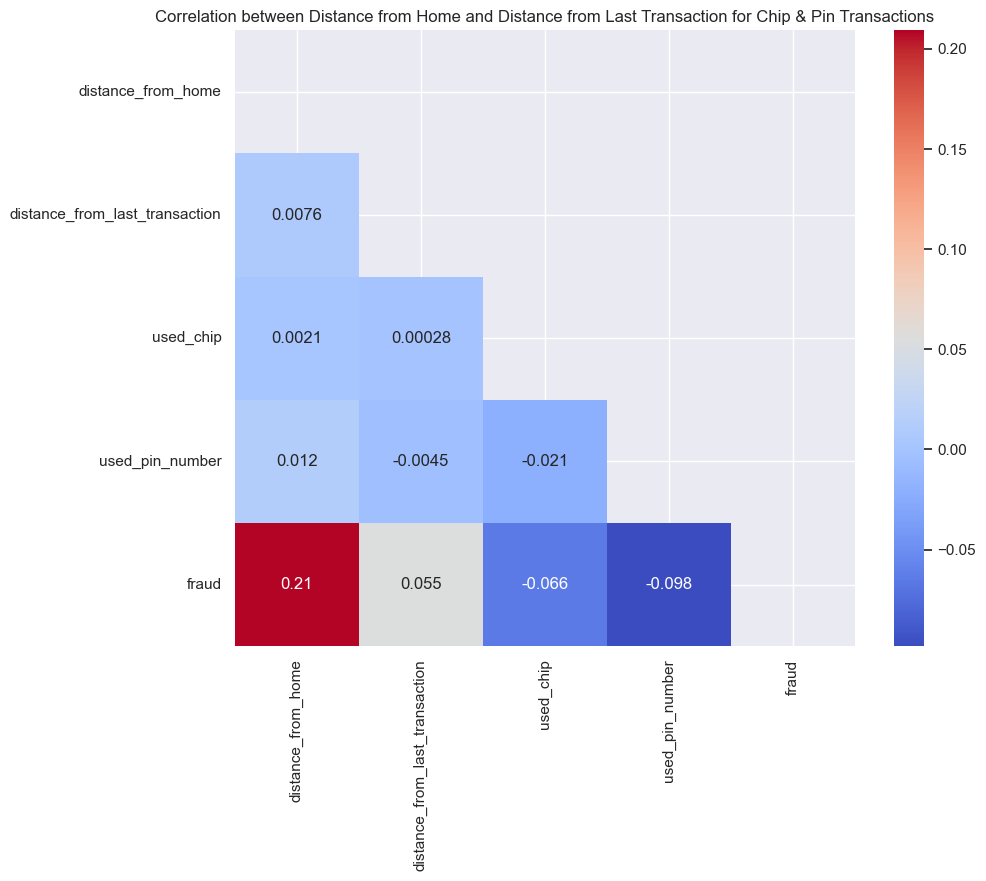

In [29]:
# Calculate correlation matrix
corr_matrix = df1.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Create correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation between Distance from Home and Distance from Last Transaction for Chip & Pin Transactions')
plt.show()


**From the heatmap above, we notice that there is no obvioius correlation between any of the attributes in the data set.**

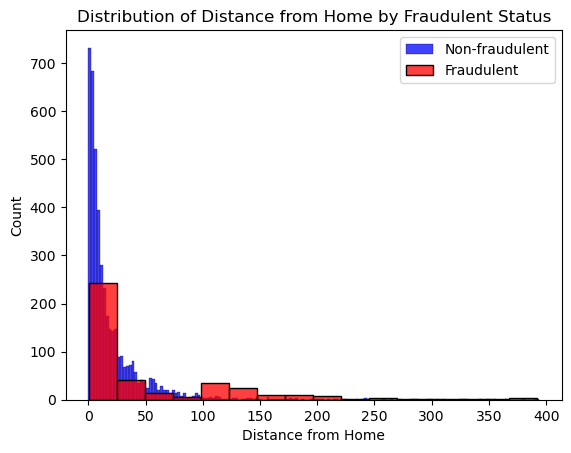

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create two kernel density plots
sns.histplot(data=df[df["fraud"]==0], x="distance_from_home", color="blue", label="Non-fraudulent")
sns.histplot(data=df[df["fraud"]==1], x="distance_from_home", color="red", label="Fraudulent")
plt.xlabel("Distance from Home")
plt.title("Distribution of Distance from Home by Fraudulent Status")
plt.legend()
plt.show()



<Axes: xlabel='fraud', ylabel='distance_from_home'>

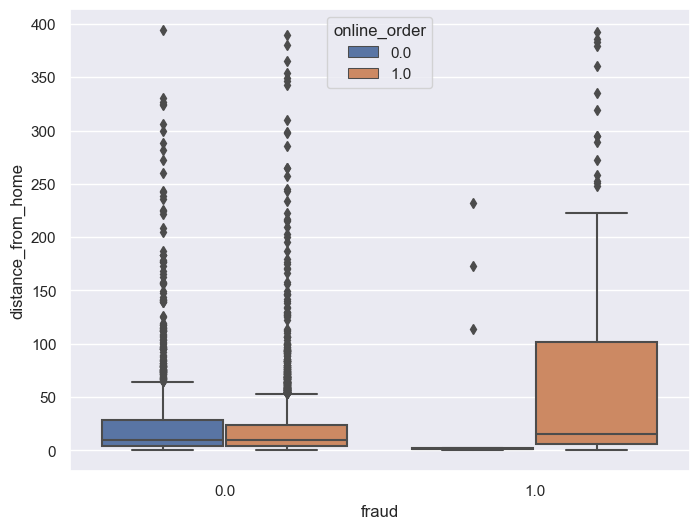

In [31]:
import seaborn as sns

sns.boxplot(x="fraud", y="distance_from_home", hue="online_order", data=df)


**This boxplot shows the distribution of distance from home for each combination of fraudulent/non-fraudulent and online/not online transactions, allowing us to compare the relationships between distance from home and fraud for different types of transactions. We can see that most fraudulent transaction happened to take place online (without the use of chip) at a large distance from home and very few were physical transactions.**

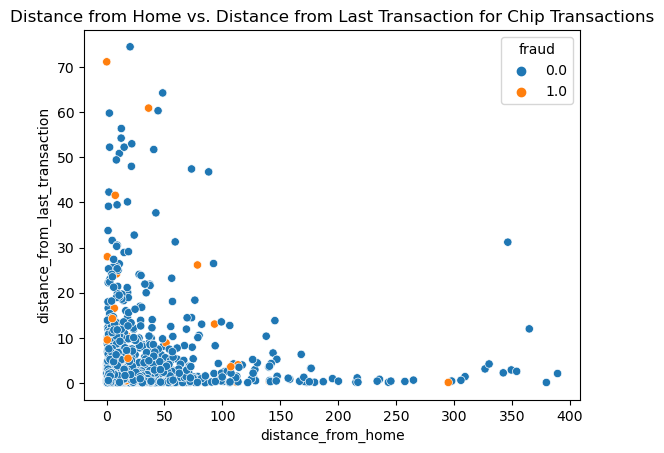

In [13]:
chip_df = df[df['used_chip'] == 1]
sns.scatterplot(data=chip_df, x='distance_from_home', y='distance_from_last_transaction', hue='fraud')
plt.title('Distance from Home vs. Distance from Last Transaction for Chip Transactions')
plt.show()



# **CONCLUSION**

**In conclusion, this exploratory data analysis provides some initial insights into the relationships between the distances from home and last transaction and the likelihood of a transaction being fraudulent. .**